#**Comparaison de trois algorithmes d'apprentissage automatique (SVM,kNN et RandomForest)**

###**Description** :
Cette étude vise à créer deux modèles d'intelligence artificielle pour la prédiction des maladies cardiaques en utilisant un ensemble de données préalablement collecté à partir de Kaggle. Les modèles sera entraîné à prédire les genres les plus susceptibles de développer des maladies cardiaques en fonction de plusieurs facteurs tels que l'âge, le rythme cardiaque, la glycémie, etc. Deux algorithmes d'apprentissage automatique seront comparés afin de déterminer celui offrant les meilleures performances pour cette tâche.

####**- Étape 1 : Collecte de données (ou téléchargement à partir de Kaggle)**

Ce jeu de données sur les maladies cardiaques est constitué en combinant 5 ensembles de données populaires sur les maladies cardiaques déjà disponibles indépendamment mais non combinés auparavant. Dans ce jeu de données, 5 ensembles de données sur les maladies cardiaques sont combinés sur 11 caractéristiques communes, ce qui en fait le plus grand jeu de données sur les maladies cardiaques disponible à ce jour à des fins de recherche. Les cinq ensembles de données utilisés pour sa création sont :

- Cleveland
- Hongrois
- Suisse
- Long Beach VA
- Ensemble de données Statlog (Heart)

Ce jeu de données se compose de 1190 instances avec 11 caractéristiques. Ces ensembles de données ont été collectés et combinés en un seul endroit pour aider à faire avancer la recherche sur les algorithmes d'apprentissage automatique et de fouille de données liés à la CAD, et espérons-le, pour faire progresser le diagnostic clinique et le traitement précoce.

### **- Étape 2 : Traitement des données**

Dans cette étape, les données sont préparées en les simplifiant si nécessaire, notamment en attribuant des valeurs binaires (1 et 0) à des champs qui peuvent varier. De plus, des méthodes telles que l'imputation des valeurs manquantes ou la suppression des colonnes contenant plusieurs champs vides sont utilisées pour garantir la qualité des données.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#Lecture d'un fichier CSV dans un DataFrame pandas.
df = pd.read_csv('/content/sample_data/heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,2,140,289,0,0,172,0,0.0,1,normal
1,49,female,3,160,180,0,0,156,0,1.0,2,heart disease
2,37,male,2,130,283,0,1,98,0,0.0,1,normal
3,48,female,4,138,214,0,0,108,1,1.5,2,heart disease
4,54,male,3,150,195,0,0,122,0,0.0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,1,110,264,0,0,132,0,1.2,2,heart disease
1186,68,male,4,144,193,1,0,141,0,3.4,2,heart disease
1187,57,male,4,130,131,0,0,115,1,1.2,2,heart disease
1188,57,female,2,130,236,0,2,174,0,0.0,2,heart disease


In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   object 
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   object 
dtypes: float64(1), int64(9), object(2)
memory usage: 111.7+ KB


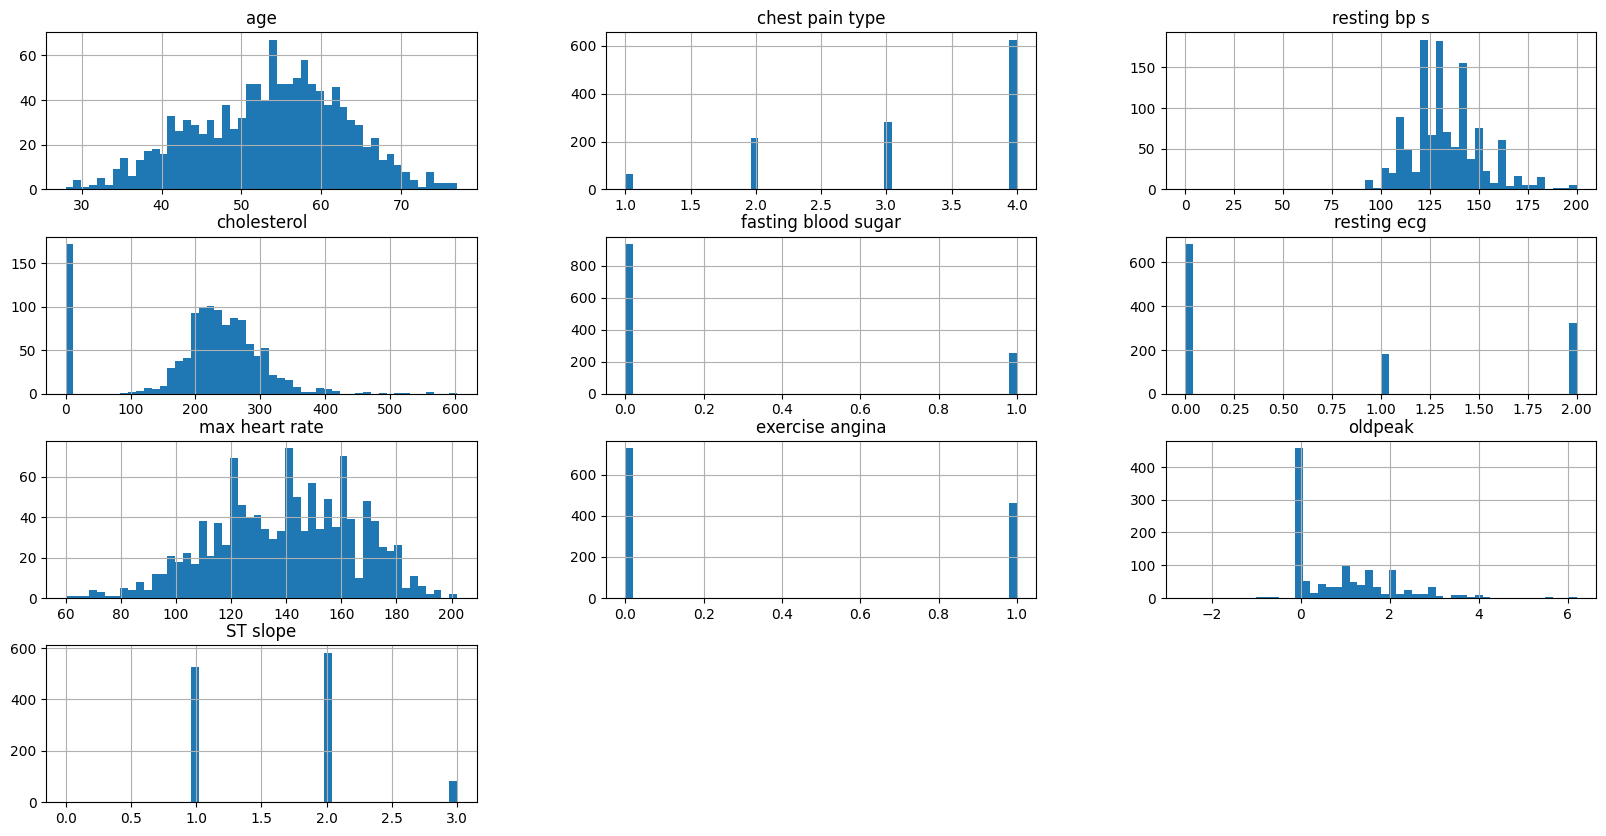

In [ ]:
df.hist(figsize=(20,10),bins = 50);

In [ ]:
# Calculer les pourcentages de cholesterol
min_cholesterol = df['cholesterol'].min()
max_cholesterol = df['cholesterol'].max()
df['cholesterol'] = ((df['cholesterol'] - min_cholesterol) / (max_cholesterol - min_cholesterol) * 100).map('{:.0f}'.format)
# Écrire le DataFrame mis à jour dans le fichier CSV (remplacement de l'ancienne colonne)
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,2,140,48,0,0,172,0,0.0,1,normal
1,49,female,3,160,30,0,0,156,0,1.0,2,heart disease
2,37,male,2,130,47,0,1,98,0,0.0,1,normal
3,48,female,4,138,35,0,0,108,1,1.5,2,heart disease
4,54,male,3,150,32,0,0,122,0,0.0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,1,110,44,0,0,132,0,1.2,2,heart disease
1186,68,male,4,144,32,1,0,141,0,3.4,2,heart disease
1187,57,male,4,130,22,0,0,115,1,1.2,2,heart disease
1188,57,female,2,130,39,0,2,174,0,0.0,2,heart disease


In [ ]:
# Replace values in 'sex' column
df['sex'] = df['sex'].replace({'female': 0, 'male': 1})

# Replace values in 'target' column
df['target'] = df['target'].replace({'normal': 0, 'heart disease': 1})

# Afficher le DataFrame modifié
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,48,0,0,172,0,0.0,1,0
1,49,0,3,160,30,0,0,156,0,1.0,2,1
2,37,1,2,130,47,0,1,98,0,0.0,1,0
3,48,0,4,138,35,0,0,108,1,1.5,2,1
4,54,1,3,150,32,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,44,0,0,132,0,1.2,2,1
1186,68,1,4,144,32,1,0,141,0,3.4,2,1
1187,57,1,4,130,22,0,0,115,1,1.2,2,1
1188,57,0,2,130,39,0,2,174,0,0.0,2,1


<Axes: >

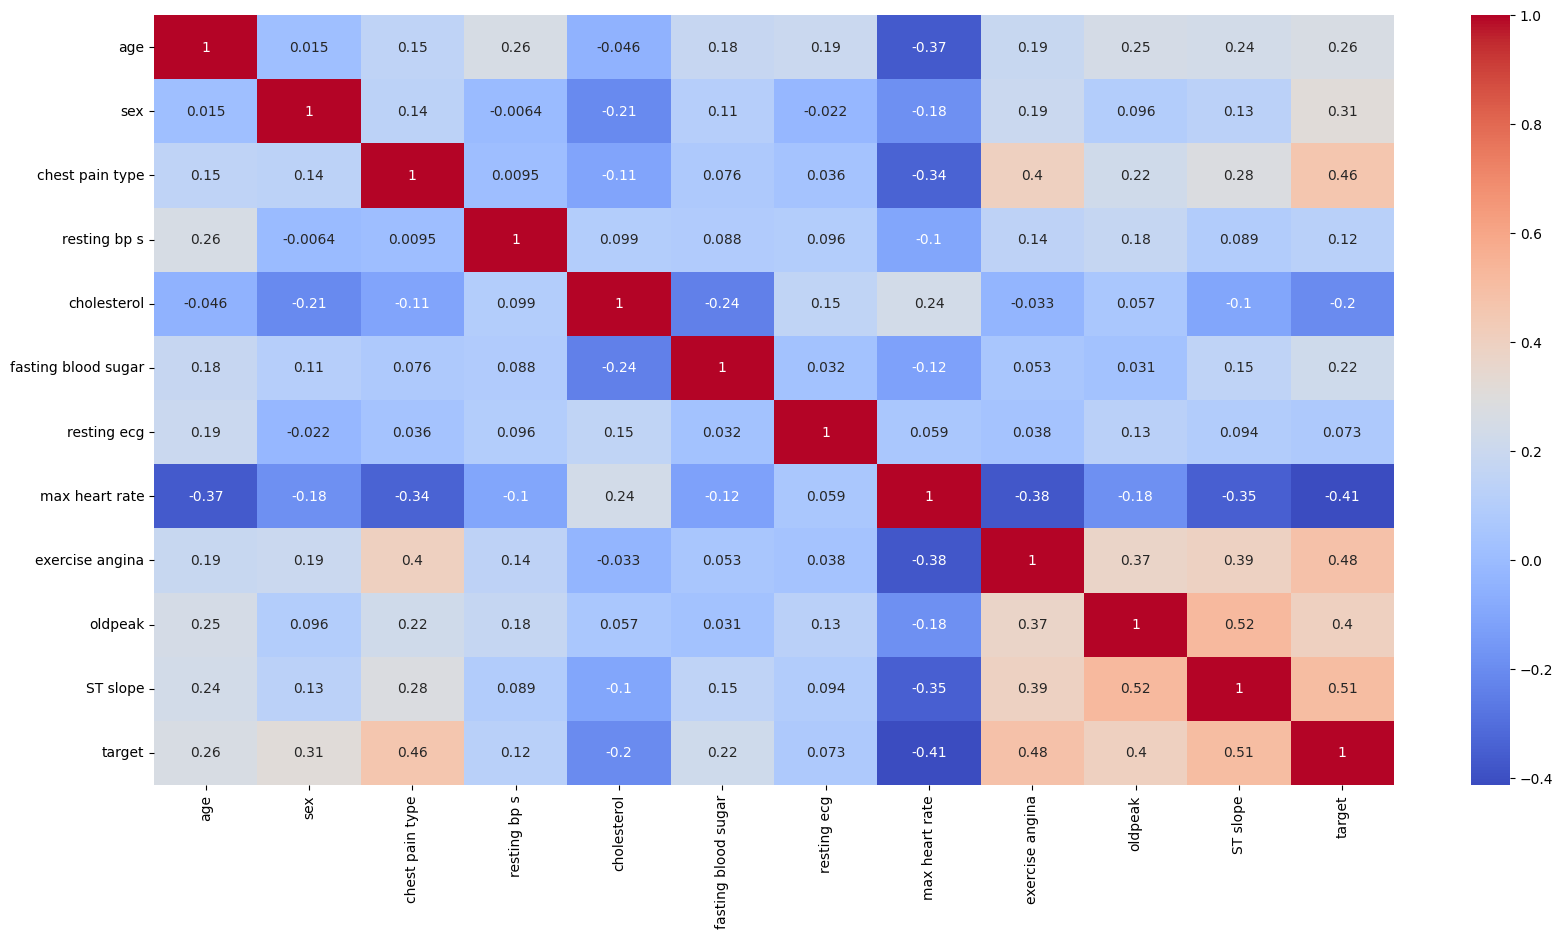

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

##**Observations :**


1. L'ensemble de données semble propre.
2. Toutes les valeurs sont numériques et non nulles.
3. La colonne 'target' est assez bien équilibrée.
4. La répartition de toutes les colonnes semble bien équilibrée. Seuls « cholestérol » et « oldpeak » pourraient avoir une distribution asymétrique avec de longues queues droites. Nous le vérifierons à l’aide de visualisations.

In [ ]:
# Définir une variable X pour les caractéristiques (features) du dataframe et y pour la colonne target.
X = df.drop('target', axis=1)
y = df['target']

# Diviser les données en ensembles d'entraînement et de test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##**Modélisation d'apprentissage automatique**


k: 1 Cross-Validation Scores: [0.63865546 0.73109244 0.84033613 0.88655462 0.94537815] Mean Score: 0.8084033613445378
k: 2 Cross-Validation Scores: [0.6302521  0.77731092 0.7605042  0.68487395 0.74789916] Mean Score: 0.7201680672268906
k: 3 Cross-Validation Scores: [0.64285714 0.72689076 0.79831933 0.68487395 0.76470588] Mean Score: 0.723529411764706
k: 4 Cross-Validation Scores: [0.66386555 0.76470588 0.81092437 0.63865546 0.69327731] Mean Score: 0.7142857142857142
k: 5 Cross-Validation Scores: [0.67226891 0.71428571 0.79411765 0.69327731 0.72268908] Mean Score: 0.7193277310924369
k: 6 Cross-Validation Scores: [0.67226891 0.76890756 0.78991597 0.67647059 0.69747899] Mean Score: 0.7210084033613446
k: 7 Cross-Validation Scores: [0.70168067 0.7394958  0.80252101 0.68487395 0.70168067] Mean Score: 0.7260504201680673
k: 8 Cross-Validation Scores: [0.68907563 0.74789916 0.82352941 0.67226891 0.69327731] Mean Score: 0.7252100840336135
k: 9 Cross-Validation Scores: [0.68907563 0.71848739 0.79

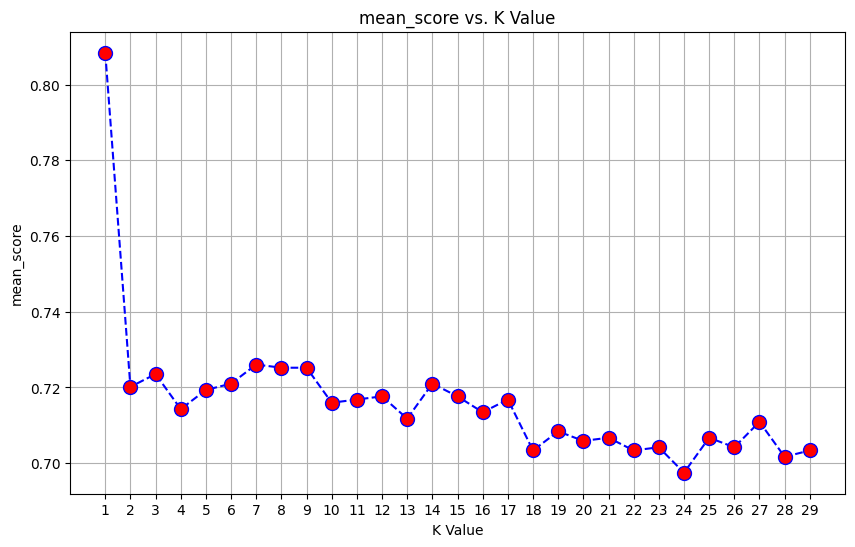

Best K: 1 with Accuracy: 0.8084033613445378


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracies = []
best_k = None
knn_best_mean_score = 0

# Parcourir différentes valeurs de k pour trouver le nombre optimal de voisins pour le KNN
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X, y, cv=5) # cv=5 means 5-fold cross-validation
    mean_score = scores.mean()
    print("k:", k, "Cross-Validation Scores:", scores, "Mean Score:", mean_score)
    accuracies.append(mean_score)
# Mettre à jour le meilleur score moyen et le meilleur k si un meilleur score moyen est trouvé
    if mean_score > knn_best_mean_score:
        knn_best_mean_score = mean_score
        best_k = k

# Affichage des resultas
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('mean_score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('mean_score')
plt.xticks(np.arange(1, 30, step=1))
plt.grid()
plt.show()

print("Best K:", best_k, "with Accuracy:", knn_best_mean_score)


KNN Accuracy Score:  0.8067226890756303


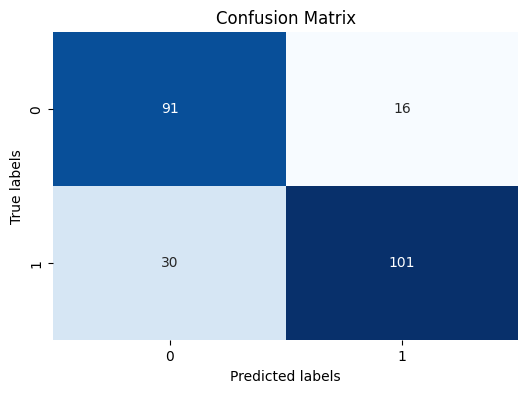

In [ ]:
#implimenté le knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score

cancer_predect = KNeighborsClassifier(n_neighbors=best_k)
cancer_predect.fit(X_train,  y_train)
predicted = cancer_predect.predict(X_test)


accuracy = accuracy_score(predicted,y_test)
print("KNN Accuracy Score: ",accuracy)

conf_matrix = confusion_matrix(y_test, predicted)

# Tracer la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Kernel linear Cross-Validation Scores: [0.85714286 0.81932773 0.86554622 0.76470588 0.78151261]
Kernel poly Cross-Validation Scores: [0.70168067 0.66806723 0.79411765 0.68067227 0.67226891]
Kernel rbf Cross-Validation Scores: [0.68067227 0.67226891 0.79411765 0.67226891 0.64285714]
Kernel sigmoid Cross-Validation Scores: [0.50840336 0.45378151 0.51260504 0.42436975 0.48319328]


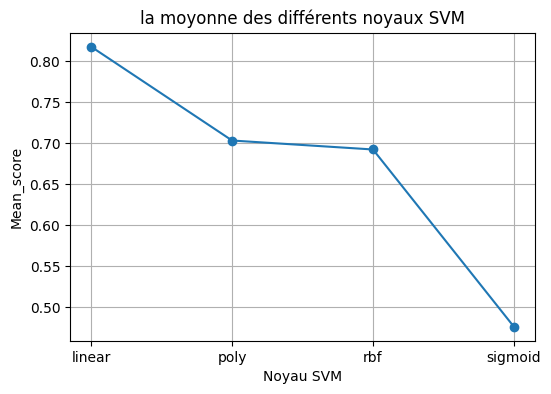

In [ ]:
from sklearn import svm


# Entraîner des modèles SVM avec différents noyaux.
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
svm_best_accuracy = 0
best_kernel = None
svm_best_mean_score = 0

for kernel in kernels:
    model = svm.SVC(kernel=kernel)

    scores = cross_val_score(model,  X, y, cv=5)  # cv=5 means 5-fold cross-validation
    print("Kernel " + kernel +" Cross-Validation Scores:", scores)
    mean_score = scores.mean()
    accuracies.append(mean_score)
    if mean_score > svm_best_mean_score:
      svm_best_mean_score = mean_score
      best_kernel = kernel

# affichage les scores d'accuracy
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(kernels) + 1), accuracies, marker='o', linestyle='-')
plt.title('la moyonne des différents noyaux SVM')
plt.xlabel('Noyau SVM')
plt.ylabel('Mean_score')
plt.xticks(range(1, len(kernels) + 1), kernels)
plt.grid(True)
plt.show()

linear Kernel Accuracy Score: 0.8529411764705882


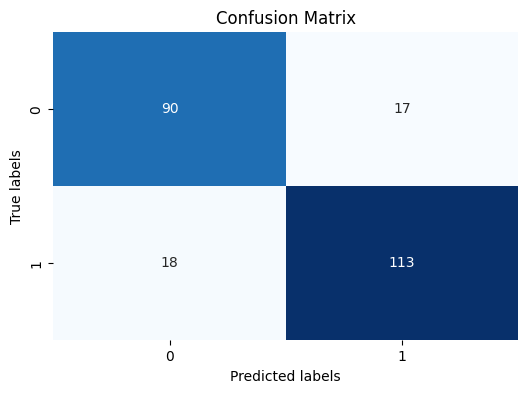

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# noyau Linear
model_linear = svm.SVC(kernel=best_kernel)
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)


accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(best_kernel,"Kernel Accuracy Score:", accuracy_linear)

conf_matrix = confusion_matrix(y_test, y_pred_linear)

# Tracer la matrice de confusion sous forme de carte thermique.
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC


# Create and train the SVM classifier
svm_classifier = SVC(kernel=best_kernel)
svm_classifier.fit(X_train, y_train)

# Weights and bias obtained from the trained SVM classifier
weights = svm_classifier.coef_[0]
bias = svm_classifier.intercept_[0]

# New fruit to classify

res =svm_classifier.predict(X_test);
print(res);
print(bias);
print(weights);

[1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1
 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1]
-3.626003070758591
[ 0.01800367  0.71332684  0.5113984  -0.00278116 -0.01203902  0.44646789
 -0.01928843 -0.00633524  0.77074563  0.21890679  1.02720244]


Criterion: gini n_estimators: 100 Cross-Validation Scores: [0.88235294 0.88235294 0.95798319 0.93277311 0.97058824] Mean Score: 0.9252100840336135
Criterion: gini n_estimators: 200 Cross-Validation Scores: [0.8907563  0.88235294 0.95378151 0.93277311 0.96638655] Mean Score: 0.9252100840336135
Criterion: gini n_estimators: 300 Cross-Validation Scores: [0.90336134 0.88655462 0.96218487 0.92436975 0.96638655] Mean Score: 0.9285714285714286
Criterion: gini n_estimators: 400 Cross-Validation Scores: [0.89915966 0.8907563  0.95798319 0.93277311 0.96638655] Mean Score: 0.9294117647058824
Criterion: entropy n_estimators: 100 Cross-Validation Scores: [0.89915966 0.89495798 0.97058824 0.92436975 0.96218487] Mean Score: 0.9302521008403362
Criterion: entropy n_estimators: 200 Cross-Validation Scores: [0.91176471 0.8907563  0.97058824 0.93277311 0.96638655] Mean Score: 0.934453781512605
Criterion: entropy n_estimators: 300 Cross-Validation Scores: [0.90756303 0.89495798 0.96218487 0.92436975 0.9663

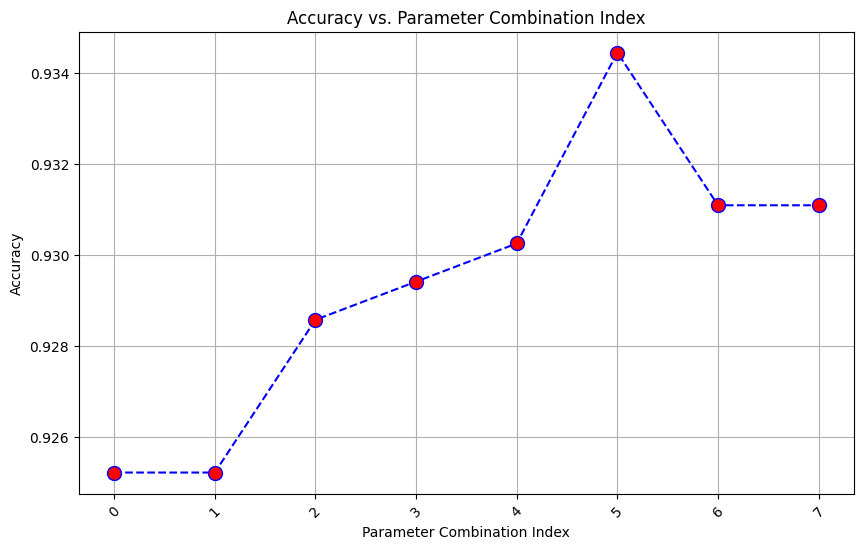

Best Parameters: {'criterion': 'entropy', 'n_estimators': 200}
Best Score: 0.934453781512605


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 400]
}

accuracies = []
best_params = {}
rf_best_mean_score = 0

# Loop over each parameter combination
for criterion in params['criterion']:
    for n_estimators in params['n_estimators']:

        # Instantiate the RandomForestClassifier model with current parameters
        rf_model = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, random_state=33)

        # Perform cross-validation
        scores = cross_val_score(rf_model,  X, y, cv=5)

        # Calculate the mean accuracy
        mean_score = scores.mean()

        print("Criterion:", criterion, "n_estimators:", n_estimators, "Cross-Validation Scores:", scores, "Mean Score:", mean_score)

        accuracies.append(mean_score)
        if mean_score > rf_best_mean_score:
            rf_best_mean_score = mean_score
            best_params = {'criterion': criterion, 'n_estimators': n_estimators}

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracies)), accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. Parameter Combination Index')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(accuracies)), rotation=45)
plt.grid()
plt.show()

print("Best Parameters:", best_params)
print("Best Score:", rf_best_mean_score)


Accuracy Score: 0.957983193277311


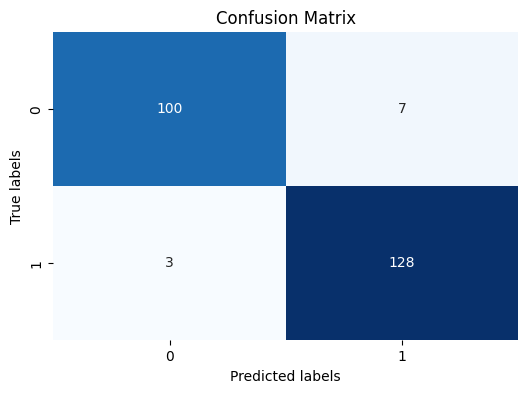

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy',n_estimators=200,random_state=33) #criterion can be also : gini
RandomForestClassifierModel.fit(X_train, y_train);
y_pred = RandomForestClassifierModel.predict(X_test);

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy Score:",accuracy);


conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()